# Proyecto Rifeco GG: Clasificación de jugadores por liga.
### Data Mining 2021 UTFSM
#### Integrantes:
* Matías Concha 201530017-8
* Jorge Fernández 2015 xd
* María Fernanda Rivas 201584033-4

## Introducción

### Objetivo
El objetivo de esta sección del proyecto es ...

# Bibliotecas

In [61]:
# Python basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
from matplotlib.colors import ListedColormap

In [62]:
# Data Preprocessing libraries

# for splitting data into training and testing
from sklearn.model_selection import train_test_split

# standardize features removing the mean and scaling to unit variance
from sklearn.preprocessing import StandardScaler

# metris for classifiers evaluation
from sklearn import metrics

In [63]:
# Classifiers

# multilayer perceptron classifier
from sklearn.neural_network import MLPClassifier

# K nearest neighbors classifier
from sklearn.neighbors import KNeighborsClassifier

# Support vector machine, C-support vector classifier
from sklearn.svm import SVC

# Gaussian process classifier
from sklearn.gaussian_process import GaussianProcessClassifier

# radial basis function kernel (squared exponential kernel)
from sklearn.gaussian_process.kernels import RBF

# Decision tree classifier
from sklearn.tree import DecisionTreeClassifier

# Ensemble classifiers: Random forest and AdaBoost
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# Naive Bayes classifier
from sklearn.naive_bayes import GaussianNB

# Quadratic Discriminant Analysis classifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

# Adquisición de datos

In [64]:
# Reading the data
# df = pd.read_csv('la2_rankIIIonly_extended.csv')
df = pd.read_csv('csv/la2_50matchs.csv')
df.describe()

,gameId,wins,losses,championId,spell1Id,spell2Id,kills,deaths,assists,largestKillingSpree,...,totalMinionsKilled,goldEarned,goldSpent,visionScore,team-towerKills,team-inhibitorKills,team-baronKills,team-dragonKills,team-vilemawKills,team-riftHeraldKills
count,1.182920e+05,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,...,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.000000,118292.0,118292.000000
mean,1.038999e+09,84.462660,83.969863,150.837926,9.715205,10.848020,6.568196,6.515166,9.274414,2.776621,...,90.415277,11207.835475,10226.299843,18.704359,4.836853,0.904719,0.332609,1.629916,0.0,0.629890
std,3.559839e+07,102.635851,97.707496,181.910544,10.872346,11.287127,5.421333,3.700414,7.390260,2.761656,...,68.023163,4344.813449,4222.167591,17.389994,3.651228,1.169749,0.586446,1.483679,0.0,0.730798
min,7.230876e+08,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,664.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
25%,1.033424e+09,14.000000,18.000000,40.000000,4.000000,4.000000,3.000000,4.000000,4.000000,0.000000,...,32.000000,8260.000000,7430.000000,7.000000,2.000000,0.000000,0.000000,0.000000,0.0,0.000000
50%,1.053863e+09,48.000000,50.000000,89.000000,4.000000,7.000000,5.000000,6.000000,8.000000,2.000000,...,74.000000,10946.000000,9975.000000,16.000000,4.000000,0.000000,0.000000,1.000000,0.0,0.000000
75%,1.059435e+09,112.000000,111.000000,164.000000,12.000000,14.000000,9.000000,9.000000,13.000000,4.000000,...,142.000000,13843.000000,12750.000000,26.000000,8.000000,2.000000,1.000000,3.000000,0.0,1.000000
max,1.063092e+09,829.000000,844.000000,887.000000,54.000000,54.000000,69.000000,52.000000,73.000000,69.000000,...,443.000000,39981.000000,63620.000000,190.000000,11.000000,13.000000,4.000000,8.000000,0.0,2.000000


In [65]:
# Review missing data
print(df.isnull().sum())

gameId                         0
region                         0
summonerName                   0
tier                           0
rank                           0
tierRank                       0
wins                           0
losses                         0
win                            0
lane                           0
role                           0
championId                     0
spell1Id                       0
spell2Id                       0
kills                          0
deaths                         0
assists                        0
largestKillingSpree            0
largestMultiKill               0
killingSprees                  0
longestTimeSpentLiving         0
doubleKills                    0
tripleKills                    0
quadraKills                    0
pentaKills                     0
totalDamageDealt               0
totalDamageDealtToChampions    0
totalHeal                      0
totalUnitsHealed               0
damageDealtToObjectives        0
timeCCingO

In [66]:
# Eliminate rows with missing values
df.dropna(inplace=True)

# Selección de datos útiles
## para la matriz de datos de análisis 'X' se seleccionan todos los datos excepto 
* **tier**: Liga, dado que nuestra variable objetivo
* **rank**: Dado que es una variable que subdivide las ligas, no es de interés para este caso.
* **tierRank**: Fusión de las dos variables anteriores.
* **summonerName**: Nombre del jugador, irrelevante.
* **lane**: Posición del jugador en el mapa del juego al inicio del juego, irrelevante.
* **role**: Rol del jugador durante el juego, irrelevante.

In [67]:
X = df.drop(['tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role'], axis=1).values
X_columns = df.drop(['tier', 'rank', 'tierRank', 'region', 'summonerName', 'lane', 'role'], axis=1).columns
y = df[['tier']].to_numpy().ravel()

In [68]:
# encoding categorical data e.g. tier as a dummy variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:,1] = labelencoder_X.fit_transform(X[:,1])

# encoding categorical data e.g. tier as a dummy variable
y,class_names = pd.factorize(y)

In [69]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, stratify=y, random_state = 42)

In [70]:
names = [
            # "Nearest Neighbors",
            # "SVM Linear",
            # "SVM rbf",
            # "GP",
            " Decision Tree ",
            " Random Forest ",
            # "Neural Net", 
            "== Ada Boost ==",
            # "Naive Bayes",
            "===== QDA ====="
        ]        
        
classifiers = [
    # KNeighborsClassifier(500),
    # SVC(kernel="linear", C=0.03, probability = True),
    # SVC(gamma=1.5, C=1, probability = True),
    # GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(criterion='gini', max_depth=8, random_state=3),
    RandomForestClassifier(criterion='gini', max_depth=8, n_estimators=100, random_state=3),
    # MLPClassifier(alpha=1),
    AdaBoostClassifier(),
    # GaussianNB(),
    QuadraticDiscriminantAnalysis()
    ]

In [71]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

======================== Decision Tree ========================
Confusion matrix:
Predicted  BRONZE  DIAMOND  GOLD  IRON  PLATINUM  SILVER
Actual                                                  
BRONZE       4480       12    61   181        74     111
DIAMOND        14     4793    54     0        34      29
GOLD           64       44  4696    43        40      75
IRON          213        1    45  4573        34      88
PLATINUM       84       39    44    34      4669      67
SILVER         84       28    55    93        60    4557
Classification report:
              precision    recall  f1-score   support

        IRON       0.93      0.92      0.93      4954
      BRONZE       0.91      0.91      0.91      4919
      SILVER       0.92      0.93      0.93      4877
        GOLD       0.95      0.95      0.95      4962
    PLATINUM       0.95      0.95      0.95      4937
     DIAMOND       0.97      0.97      0.97      4924

    accuracy                           0.94     29573
   ma

C:\Users\matia\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Confusion matrix:
Predicted  BRONZE  DIAMOND  GOLD  IRON  PLATINUM  SILVER
Actual                                                  
BRONZE       2255      585   370  1356        91     262
DIAMOND       466     3750   378    99       109     122
GOLD         1427     1749   818   457       172     339
IRON         1390      376   195  2734        66     193
PLATINUM      980     2384   700   346       236     291
SILVER       1912     1079   568   806       130     382
Classification report:
              precision    recall  f1-score   support

        IRON       0.47      0.55      0.51      4954
      BRONZE       0.27      0.46      0.34      4919
      SILVER       0.24      0.08      0.12      4877
        GOLD       0.27      0.16      0.20      4962
    PLATINUM       0.29      0.05      0.08      4937
     DIAMOND       0.38      0.76      0.51      4924

    accuracy                           0.34     29573
   macro avg       0.32      0.34      0.29     29573
weighted avg   

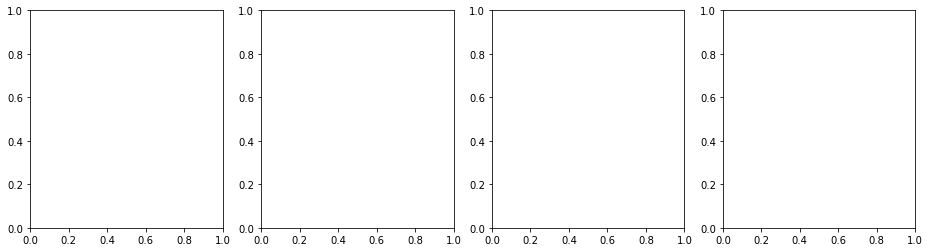

In [83]:
i=1
models=[]
plt.figure(figsize=(20,4))
for name, clf in zip(names, classifiers):
        print('========================'+ name + '========================')
        # fit the model using the training set
        models.append(clf.fit(X_train, y_train))
        
        y_pred = clf.predict(X_test)

        y_pred_labeled, y_test_labeled = class_names[y_pred], class_names[y_test]

        print("Confusion matrix:")
        print(pd.crosstab(y_test_labeled, y_pred_labeled, rownames=['Actual'], colnames=['Predicted']))
        print("Classification report:")
        print(classification_report(y_test, y_pred, target_names=class_names))

        print('===============================================================\n')
        print(' ')

        i += 1

In [ ]:
# # Visualize the tree by graphiz
# import graphviz
# from sklearn import tree
# import os
# os.environ["PATH"] += os.pathsep + 'C:/Users/matia/anaconda3/Library/bin/graphviz/'
# feature_names = X_columns
# dot_data = tree.export_graphviz(classifier, out_file=None, filled=True, rounded = True, feature_names=feature_names, class_names=class_names)
# graph = graphviz.Source(dot_data)
# graph